In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import pandas as pd
import ml_dtypes

Scales & Tails (i.e. using kurtosis to measure the qty of outliers)

# Visualisation Ideation

In [3]:
e4m3 = ml_dtypes.finfo(ml_dtypes.float8_e4m3fn)
M,N = 500,500

In [20]:
e4m3

finfo(resolution=0.101562, min=-4.48e+02, max=4.48e+02, dtype=float8_e4m3fn)

In [4]:
X_fp8 = torch.rand((M,N)) * e4m3.max # doesn't quantise correctly

In [5]:
X_fp8_base2 = torch.log2(X_fp8).round()

## Layer-Wise (Static View) 


Text(0.5, 0.98, 'Layer-Wise Static View')

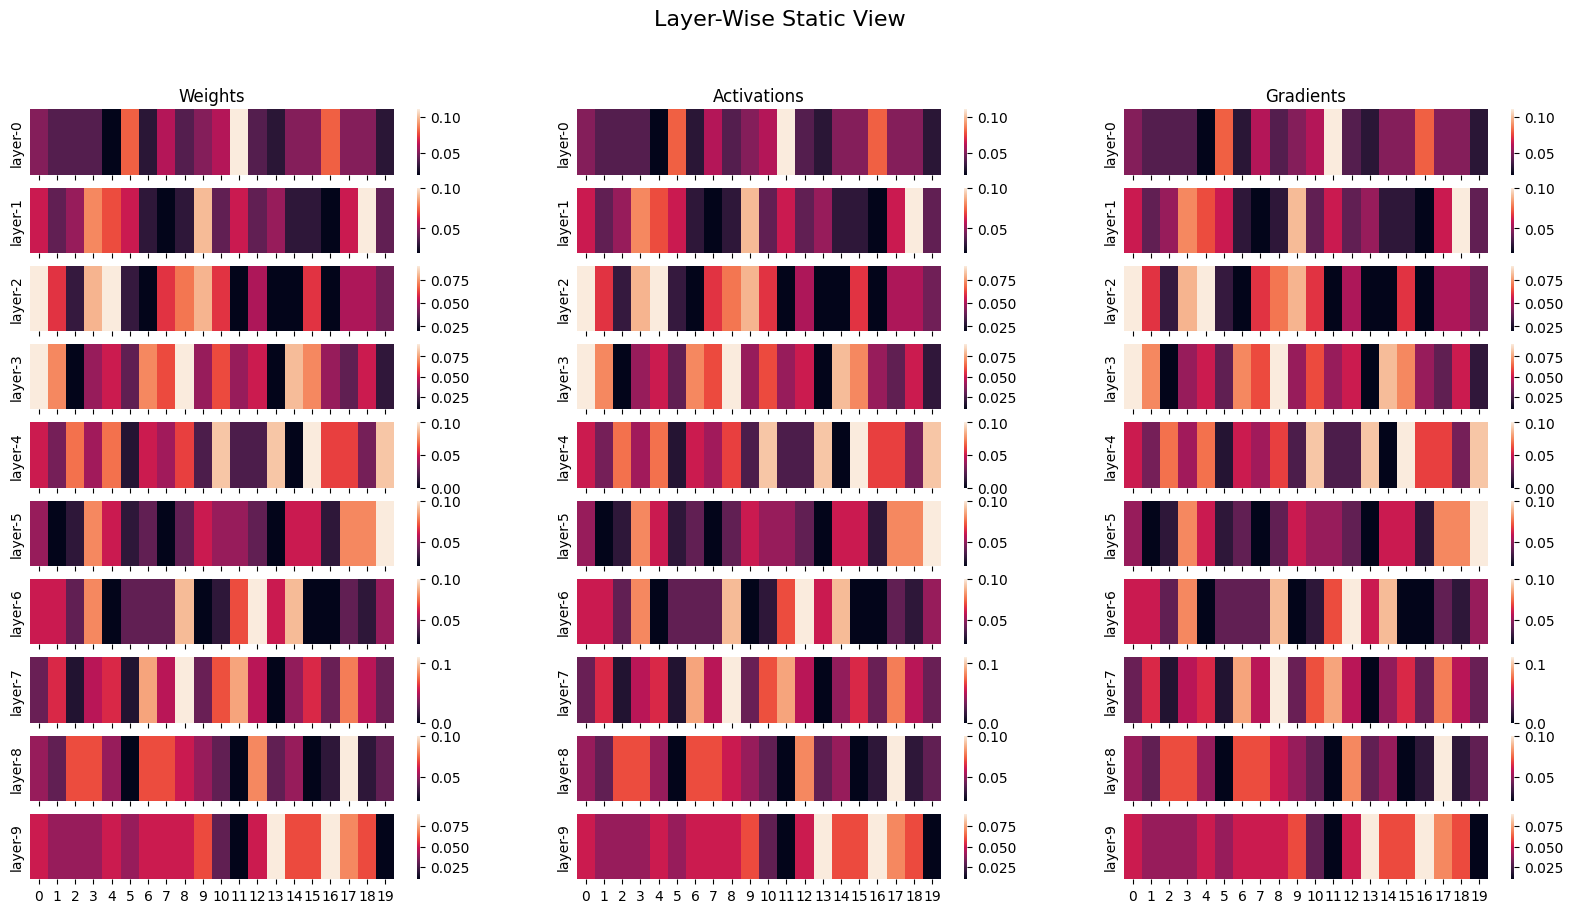

In [39]:
# Define the base plot
fig, axs = plt.subplots(ncols=3, nrows=10, figsize=(20, 10), sharex='col', sharey='row')
layer_name = 'abcdefghijklmn'
for i,ax in enumerate(axs):

    # slip into columns...
    c1,c2,c3 = ax

    if i == 0:
        c1.set_title('Weights')
        c2.set_title('Activations')
        c3.set_title('Gradients')

    counts = np.histogram(np.random.randint(0, 20,(1,100)),20)[0]
    # normalise
    counts = counts / counts.sum()
    
    for c in ax:
        sns.heatmap(counts.reshape((1,counts.shape[0])),ax=c)
        c.set_yticks([])
        c.set_ylabel(f'layer-{i}')

        if i < len(axs)-1:
            c.set_xticks([])
fig.suptitle('Layer-Wise Static View', fontsize=16)

Layer-wise static view of a model
    Each box denotes all the values that value between adjacent exponents.
    Values (are just random...)

Text(0.5, 0.98, 'Layer-Wise Static View')

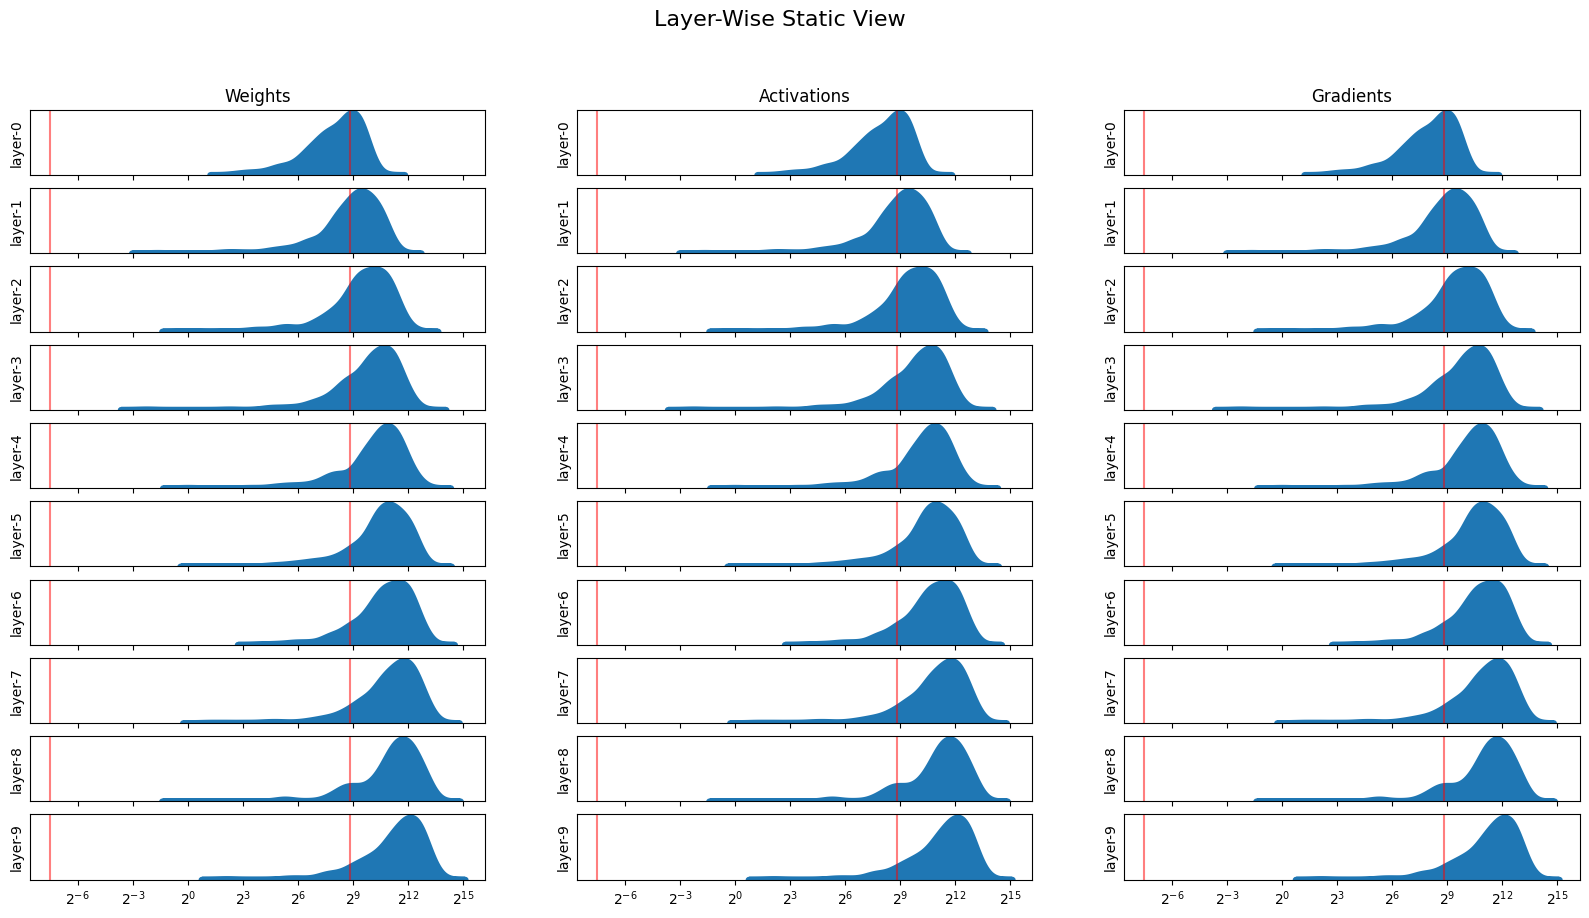

In [36]:
# Define the base plot
fig, axs = plt.subplots(ncols=3, nrows=10, figsize=(20, 10), sharex=True)
layer_name = 'abcdefghijklmn'
for i,ax in enumerate(axs):

    # slip into columns...
    c1,c2,c3 = ax

    if i == 0:
        c1.set_title('Weights')
        c2.set_title('Activations')
        c3.set_title('Gradients')

    counts = np.random.normal(0,scale=1.0+i,size=(1000))*448

    # normalise
    
    for c in ax:
        # sns.heatmap(counts.reshape((1,counts.shape[0])),ax=c)
        # sns.kdeplot(df,x='x',ax=ax, fill=True, alpha=1)
        sns.kdeplot(data=counts, fill=True, ax=c, alpha=1, lw=5, log_scale=2)
        for x, fmt in [(2**-7.5, "E4M3"), (448, "E4M3")]:
            c.axvline(x,color='red',alpha=0.5)
            # c.annotate(fmt, (x, c.get_ylim()[1]), color='r', fontsize=9, xytext=(0, 4), textcoords="offset points", va="top", ha="center")
        c.set_yticks([])
        c.set_ylabel(f'layer-{i}')

        if i < len(axs)-1:
            c.set_xticks([])
fig.suptitle('Layer-Wise Static View', fontsize=16)

Layer wise static view density plot

Text(0.5, 0.98, 'Single Layer Temporal View')

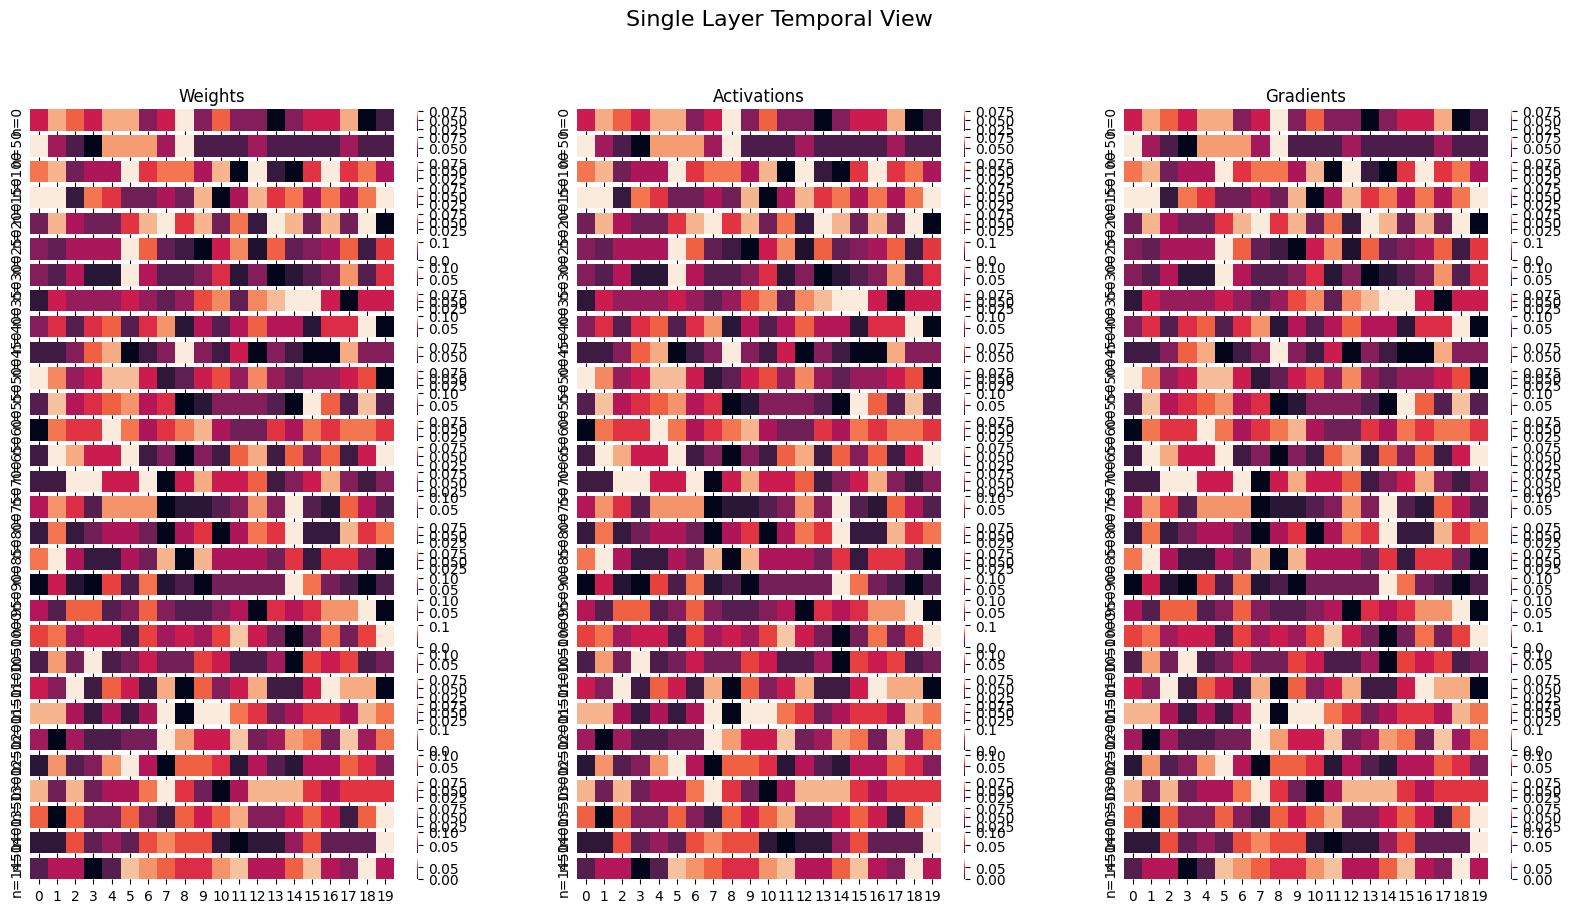

In [41]:

# Define the base plot
fig, axs = plt.subplots(ncols=3, nrows=30, figsize=(20, 10), sharex='col', sharey='row')
layer_name = 'abcdefghijklmn'
for i,ax in enumerate(axs):

    # slip into columns...
    c1,c2,c3 = ax

    if i == 0:
        c1.set_title('Weights')
        c2.set_title('Activations')
        c3.set_title('Gradients')

    counts = np.histogram(np.random.randint(0, 20,(100)),20)[0]
    # normalise
    counts = counts / counts.sum()
    
    for c in ax:
        sns.heatmap(counts.reshape((1,counts.shape[0])),ax=c)
        c.set_yticks([])
        c.set_ylabel(f'n={50*i}')

        if i < len(axs)-1:
            c.set_xticks([])
fig.suptitle('Single Layer Temporal View', fontsize=16)

Single Layer (Temporal view)
    Checkpoint weights every n iterations...
    View of how distribution of Tensor is shifting during training?

Text(0.5, 0.98, 'Single Layer Temporal View')

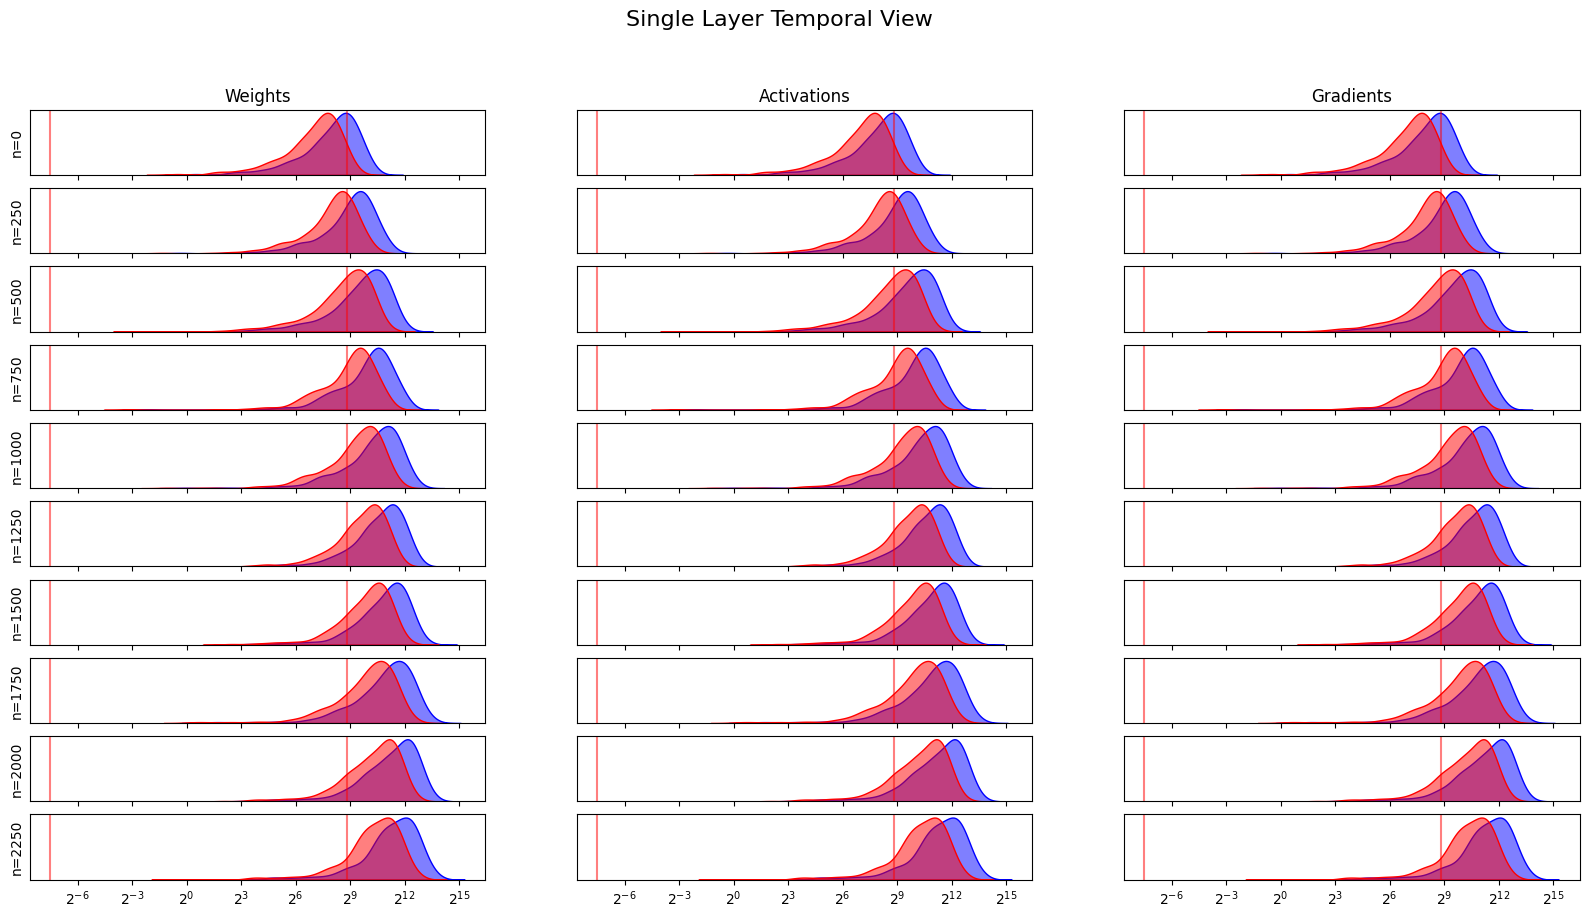

In [48]:
# Define the base plot

# Two configs ->
    # Figure Config ()
    # Plot specific Config

# Input = Logs (or List of Logs (in this case the dimensions of the logs must match,))
    # Need assertion for all log dimensions

# Based on Logging Schema?
    # cols = TrackedTensors
    # rows = Layers / Log Intervals

# figsize = Tuple(w,h) (arbitrary with defaults)
# ax is List[Row([Column(s)])]

# sharex='col' (all rows for a column share the same x-axis)
# sharey='row' (only plot (n=...) on left and side)

# .set_title ()

fig, axs = plt.subplots(ncols=3, nrows=10, figsize=(20, 10), sharex='col', sharey='row')
layer_name = 'abcdefghijklmn'

# this will be a zip over data in actual method... 
for i,ax in enumerate(axs):

    # Set the titles (before drawing the first plot)
    if i == 0:
        # iterate over columns and titles (these will be metadata from the logs)
        for c, title in zip(ax, ['Weights', 'Activations', 'Gradients']):
            c.set_title(title)

    # This will come from the log(s)
    counts = np.random.normal(0,scale=1.0+i,size=(1000))*448
    # mock log data (each run has to have a colour associated with it?)
    all_counts = [(counts,'b'), (counts/2,'r')]
    
    # iterate over columns
    for c in ax:

        # iterate over log data (data[histogram], colour)
        for (d,col) in all_counts:
            sns.kdeplot(data=d, fill=True, ax=c, alpha=0.5, color=col, lw=1, log_scale=2)

        # Iterate over format (details to add limits for min_normal, max, etc..)
        for x, fmt, lab in [(2**-7.5, "E4M3", 'min'), (448, "E4M3", 'max')]:
            c.axvline(x,color='red',alpha=0.5)
        # remove y ticks
        c.set_yticks([])
        c.set_ylabel(f'n={250*i}')

        if i < len(axs)-1:
            c.set_xticks([])
fig.suptitle('Single Layer Temporal View', fontsize=16)
# fig.legend()

In [50]:
exp_curve = np.exp([2/i for i in range(1, 100)]) 
norm_exp_curve = exp_curve 

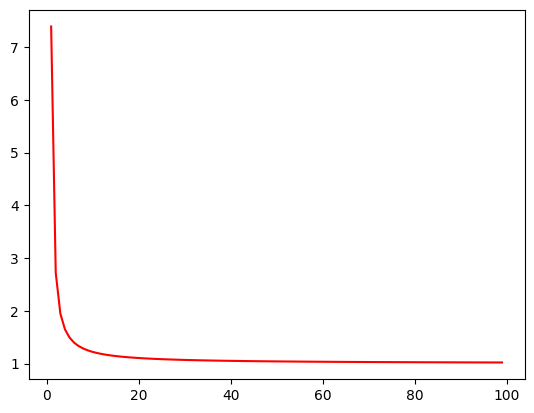

In [51]:
plt.plot(
    [i for i in range(1,100)],norm_exp_curve, color='r'
)

In [2]:
from dataclasses import dataclass
from enum import Enum
from typing import List, Dict, Any
import pickle

In [184]:
from typing import Optional


class TensorType(str, Enum):
    activation = 'activation'
    weight = 'weight'
    gradient = 'gradient'
    optimiser_state = 'optimiser_state'

# Create Enum for Stat Type...

# Log Cache... (For intelligent tracking)


# Exponent Count(s) -> Equivalent to histogram.

# Should I log scaling factors??

@dataclass
class Bin:
    counts: List[int]
    bins: List[int]
    @staticmethod
    def _from_df(df: pd.DataFrame) -> "Bin":
        """
            Temporary fn for de-serialising from Charlies data (before a final schema is inplace)
        """
        return Bin(
            bins = df.exponent_count.columns,
            counts = [list(v.values())[0] for k,v in df.exponent_count.to_dict().items()]
        )

@dataclass 
class Stats:
    """
        Container for stats gathered on a single tensor type.

        mean;
        std;
        mean_abs;
        max_abs;
        min_abs;
        rm2;
        rm4;
        rm8;
        exp_histogram -> this requires the numerical format...
    """
    scalar: Dict[str, float]
    hist: Optional[Bin] = None

    
    @staticmethod
    def _from_df(df: pd.DataFrame) -> "Stats":
        """
            Temporary fn for de-serialising from Charlies data (before a final schema is inplace)
        """
        try:
            return Stats(
                scalar={k: list(v.values())[0] for k, v in df.general_stats.to_dict().items()},
                hist=Bin._from_df(df)
            )
        except:
            return Stats(
                scalar={},
                hist = None)

@dataclass
class Module:
    name: str
    type: str
    stats: Dict[TensorType,Stats]
    ...

    @staticmethod
    def _from_df(df: pd.DataFrame) -> "Module":
        """
            Temporary fn for de-serialising from Charlies data (before a final schema is inplace)
        """
        
        return Module(
            # all names will be unique
            name=df.metadata.name.unique()[0],
            type=df.metadata.type.unique()[0],
            stats={
                TensorType.activation : Stats._from_df(df[df.metadata.grad == False]),
                TensorType.gradient : Stats._from_df(df[df.metadata.grad == True])
            }
        )
        

# Do I need a seperate Optimser class?


# @dataclass
# class Layer:
#     """
#         WIP: Ideally modules would be group by layer (not sure as to how to do this yet... so playholder for now)
#     """
#     name: str
#     modules: List[Module] = []
#     @staticmethod
#     def _from_df(df: pd.DataFrame) -> "Layer":
#         """
#             Temporary fn for de-serialising from Charlies data (before a final schema is inplace)
#         """
#         ...

@dataclass
class Iteration:
    # can either have modules or layers not both
    modules: List[Module]
    # layers: List[Layer] = []
    """
        This contains the logs for all Layer(s) / Module(s) for a single iteration of a training run..

        How to handle
    """
    @staticmethod
    def _from_df(df: pd.DataFrame) -> "Iteration":
        """
            Temporary fn for de-serialising from Charlies data (before a final schema is inplace)
        """
        # print(df.metadata.name.unique())
        return Iteration(
            modules=[Module._from_df(df[df.metadata.name == mod_name]) for mod_name in df.metadata.name.unique()] # type: ignore
            # modules=[]
        )

# architecture -> could be added as metadata here?

@dataclass
class Log:
    """
        Top Level Objects. Contains info for the Entire training run
        HP_Config would sit here..
    """
    iterations: List[Iteration]
    config: Dict[str, Any]

    @staticmethod
    def _from_df(df: pd.DataFrame) -> "Log":
        """
            Temporary fn for de-serialising from Charlies data (before a final schema is inplace)
        """
        
        print(df.metadata.step.unique())
        

        return Log(
            # filter by step number and init iteration classes
            config={},
            iterations=[Iteration._from_df(df[df.metadata.step == step]) for step in df.metadata.step.unique()]
        )
        ...
with open('real-data/numerics_df.pkl', 'rb') as f:
    src_df = pickle.load(f)



log = Log._from_df(src_df[src_df.metadata.step < 10])



[0 1 2 3 4 5 6 7 8 9]


In [3]:
with open('real-data/numerics_df.pkl', 'rb') as f:
    src_df = pickle.load(f)

In [11]:
# src_df.head().to_csv('real-data/top200.csv')
src_df.tail(400).to_csv('real-data/top200.csv')

In [185]:
for it in log.iterations:
    for mod in it.modules:
        if mod.stats[TensorType.gradient].hist == None:
            print(mod.type)

model.Transformer
model.Transformer
model.Transformer
model.Transformer
model.Transformer
model.Transformer
model.Transformer
model.Transformer
model.Transformer
model.Transformer


In [215]:
int_df  = (src_df[src_df.metadata.name != ''][src_df.metadata.step == 0])

/var/folders/ny/wphbpr0x04gd1lm5vzddz9540000gq/T/ipykernel_4732/3785521831.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  int_df  = (src_df[src_df.metadata.name != ''][src_df.metadata.step == 0])


# Real Data

In [14]:
src_df[src_df.metadata.name == ''][src_df.metadata.grad == True]

/var/folders/ny/wphbpr0x04gd1lm5vzddz9540000gq/T/ipykernel_4425/228924967.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  src_df[src_df.metadata.name == ''][src_df.metadata.grad == True]


Empty DataFrame
Columns: [(metadata, name), (metadata, type), (metadata, grad), (metadata, step), (general_stats, mean), (general_stats, std), (general_stats, mean_abs), (general_stats, max_abs), (general_stats, min_abs), (general_stats, rm2), (general_stats, rm4), (general_stats, rm8), (exponent_count, -16), (exponent_count, -15), (exponent_count, -14), (exponent_count, -13), (exponent_count, -12), (exponent_count, -11), (exponent_count, -10), (exponent_count, -9), (exponent_count, -8), (exponent_count, -7), (exponent_count, -6), (exponent_count, -5), (exponent_count, -4), (exponent_count, -3), (exponent_count, -2), (exponent_count, -1), (exponent_count, 0), (exponent_count, 1), (exponent_count, 2), (exponent_count, 3), (exponent_count, 4), (exponent_count, 5), (exponent_count, 6), (exponent_count, 7), (exponent_count, 8), (exponent_count, 9), (exponent_count, 10), (exponent_count, 11), (exponent_count, 12), (exponent_count, 13), (exponent_count, 14), (exponent_count, 15), (exponent_count, 16), (exponent_count, -inf), (exponent_count, inf)]
Index: []

[0 rows x 47 columns]

In [ ]:
# Define the base plot

# Two configs ->
    # Figure Config ()
    # Plot specific Config

# Input = Logs (or List of Logs (in this case the dimensions of the logs must match,))
    # Need assertion for all log dimensions

# Based on Logging Schema?
    # cols = TrackedTensors
    # rows = Layers / Log Intervals

# figsize = Tuple(w,h) (arbitrary with defaults)
# ax is List[Row([Column(s)])]

# sharex='col' (all rows for a column share the same x-axis)
# sharey='row' (only plot (n=...) on left and side)

# .set_title ()

fig, axs = plt.subplots(ncols=3, nrows=10, figsize=(20, 10), sharex='col', sharey='row')
layer_name = 'abcdefghijklmn'

# this will be a zip over data in actual method... 
for i,ax in enumerate(axs):

    # Set the titles (before drawing the first plot)
    if i == 0:
        # iterate over columns and titles (these will be metadata from the logs)
        for c, title in zip(ax, ['Weights', 'Activations', 'Gradients']):
            c.set_title(title)

    # This will come from the log(s)
    counts = np.random.normal(0,scale=1.0+i,size=(1000))*448
    # mock log data (each run has to have a colour associated with it?)
    all_counts = [(counts,'b'), (counts/2,'r')]
    
    # iterate over columns
    for c in ax:

        # iterate over log data (data[histogram], colour)
        for (d,col) in all_counts:
            sns.kdeplot(data=d, fill=True, ax=c, alpha=0.5, color=col, lw=1, log_scale=2)

        # Iterate over format (details to add limits for min_normal, max, etc..)
        for x, fmt, lab in [(2**-7.5, "E4M3", 'min'), (448, "E4M3", 'max')]:
            c.axvline(x,color='red',alpha=0.5)
        # remove y ticks
        c.set_yticks([])
        c.set_ylabel(f'n={250*i}')

        if i < len(axs)-1:
            c.set_xticks([])
fig.suptitle('Single Layer Temporal View', fontsize=16)
# fig.legend()